**Nome:** Wesley Lima de Araujo

**RA:** 11201721514

# Projeto Prático - Similaridade e Sumarização de reviews de jogos

Nesse projeto pretendo responder uma pergunta objetivo que é a seguinte: Dados dois documentos, se eles possuem um determinado grau de similaridade, o grau de similaridade de seus resumos, construídos através de técnicas de sumarização, é semelhante ao grau de similaridade dos documentos originais.

Como base de dados, iremos usar um corpus de 10 textos com reviews de 10 jogos de video game distintos. A base de dados foi construída pelo próprio autor do caderno com base nas reviews dos jogos feitas pelos jornalistas do portal da IGN. A construção da base também faz parte do projeto.

Segue a ordem de passos seguidos ao longo do caderno:
1. Construção da base de dados
2. Pré-processamento de texto
3. Criar matriz de similaridade entre os textos par a par
4. Criar resumo dos documentos
5. Criar matriz de similaridade entre os resumos par a par
6. Análise dos resultados
7. Conclusões e próximos trabalhos

## 1 Construção da base de dados

Os processos aqui apresntados envolvem:
* Importação dos textos com reviews do meu github pessoal
* Obtenção dos nomes dos arquivos que serão usados
* Construção do dicionário que será usado na construção do dataframe
* Construção do dataframe que será usado no resto do projeto

In [ ]:
# Importando todas as reviews que serão usadas
# Arquivos extraídos do seguinte repositório: https://github.com/WLAraujo/python_PLN/tree/main/AP04_similaridade_resumo/reviews
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/assassins_creed_black_flag.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/batman_arkham_asylum.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/bioshock.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/dark_souls.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/far_cry_6.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/horizon_zero_down.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/nioh.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/the_witcher_3.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/uncharted_4.txt
!wget https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/the_last_of_us.txt

--2021-12-08 02:24:54--  https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/assassins_creed_black_flag.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7014 (6.8K) [text/plain]
Saving to: ‘assassins_creed_black_flag.txt’

assassins_creed_bla 100%[===================>]   6.85K  --.-KB/s    in 0s      

2021-12-08 02:24:54 (62.7 MB/s) - ‘assassins_creed_black_flag.txt’ saved [7014/7014]

--2021-12-08 02:24:54--  https://raw.githubusercontent.com/WLAraujo/python_PLN/main/AP04_similaridade_resumo/reviews/batman_arkham_asylum.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [ ]:
# Importando dependências necessárias para construir o dataframe
import pandas as pd
import os
import string

In [ ]:
# Obtendo nome de todos os txts com reviews
diretorio = "/content"
arquivos = []
for arquivo in os.listdir(diretorio):
  if os.path.isfile(arquivo):
    arquivos.append(os.path.join(diretorio, arquivo).replace("/content", "").replace("/", ""))

In [ ]:
# Criando dicionário que será usado para criação do dataframe
dic = {"Nome" : [], "Review" : []}
for titulo in arquivos:
  with open(titulo) as review:
    dic["Nome"].append(titulo.replace(".txt", "").replace("_", " ").replace("/", ""))
    dic["Review"].append(review.read().replace("\n", " "))

In [ ]:
# Criando o dataframe
df = pd.DataFrame(dic)
df

,Nome,Review
0,the last of us,The Last of Us Review. Survival of the fittest...
1,batman arkham asylum,Batman: Arkham City Review. Developer Rockstea...
2,dark souls,Dark Souls Review. Are you prepared to die? Th...
3,far cry 6,Far Cry 6 Review. Ubisoft's newest colorful ex...
4,assassins creed black flag,Assassin's Creed 4: Black Flag Review. The Gol...
5,the witcher 3,The Witcher 3 Review. Witching Hours. Unlike i...
6,uncharted 4,Uncharted 4: A Thief's End Review. A remarkabl...
7,horizon zero down,Horizon Zero Dawn Review. A beautiful open wor...
8,bioshock,BioShock Review. Welcome to Rapture. BioShock ...
9,nioh,Nioh Review. A consistently engaging action RP...


## 2. Pré-processamento de texto

Nessa parte do notebook realizaremos um pipeline de pré-processamento das revies envolvendo os seguintes processos:
1. Remoção de pontuação
2. Conversão em letras minúsculas
3. Remoção de stopwords
4. Tokenização

Ao final adicionaremos duas novas colunas ao dataframe. Uma conterá os tokens e a outra conterá a recriação do documento original mas só mantendo os tokens.

In [ ]:
# Importando dependências necessárias
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Definindo função que irá fazer todos os processos citados acima
def limpeza_reviews(review):
  # Tokenização e remoção de pontuação
  blob = TextBlob(review)
  tokens = list(blob.words)
  # Conversão para minúsculo
  tokens = [token.lower() for token in tokens]
  # Remoção de stopwords
  sws = stopwords.words('english')
  tokens = [token for token in tokens if token not in sws]
  # Retornando tokens
  return tokens

In [ ]:
# Criando os tokens das reviews e adicionando uma coluna ao dataframe com eles
tokens_reviews = [limpeza_reviews(review) for review in df['Review']]
df['Tokens Review'] = tokens_reviews
df

,Nome,Review,Tokens Review
0,the last of us,The Last of Us Review. Survival of the fittest...,"[last, us, review, survival, fittest, last, us..."
1,batman arkham asylum,Batman: Arkham City Review. Developer Rockstea...,"[batman, arkham, city, review, developer, rock..."
2,dark souls,Dark Souls Review. Are you prepared to die? Th...,"[dark, souls, review, prepared, die, things, v..."
3,far cry 6,Far Cry 6 Review. Ubisoft's newest colorful ex...,"[far, cry, 6, review, ubisoft, 's, newest, col..."
4,assassins creed black flag,Assassin's Creed 4: Black Flag Review. The Gol...,"[assassin, 's, creed, 4, black, flag, review, ..."
5,the witcher 3,The Witcher 3 Review. Witching Hours. Unlike i...,"[witcher, 3, review, witching, hours, unlike, ..."
6,uncharted 4,Uncharted 4: A Thief's End Review. A remarkabl...,"[uncharted, 4, thief, 's, end, review, remarka..."
7,horizon zero down,Horizon Zero Dawn Review. A beautiful open wor...,"[horizon, zero, dawn, review, beautiful, open,..."
8,bioshock,BioShock Review. Welcome to Rapture. BioShock ...,"[bioshock, review, welcome, rapture, bioshock,..."
9,nioh,Nioh Review. A consistently engaging action RP...,"[nioh, review, consistently, engaging, action,..."


In [ ]:
# Adicionando colunas com novos documentos
docs_tokenizados = [' '.join(tokens) for tokens in df['Tokens Review']]
df['Review Limpa'] = docs_tokenizados
df

,Nome,Review,Tokens Review,Review Limpa
0,the last of us,The Last of Us Review. Survival of the fittest...,"[last, us, review, survival, fittest, last, us...",last us review survival fittest last us near-p...
1,batman arkham asylum,Batman: Arkham City Review. Developer Rockstea...,"[batman, arkham, city, review, developer, rock...",batman arkham city review developer rocksteady...
2,dark souls,Dark Souls Review. Are you prepared to die? Th...,"[dark, souls, review, prepared, die, things, v...",dark souls review prepared die things videogam...
3,far cry 6,Far Cry 6 Review. Ubisoft's newest colorful ex...,"[far, cry, 6, review, ubisoft, 's, newest, col...",far cry 6 review ubisoft 's newest colorful ex...
4,assassins creed black flag,Assassin's Creed 4: Black Flag Review. The Gol...,"[assassin, 's, creed, 4, black, flag, review, ...",assassin 's creed 4 black flag review golden a...
5,the witcher 3,The Witcher 3 Review. Witching Hours. Unlike i...,"[witcher, 3, review, witching, hours, unlike, ...",witcher 3 review witching hours unlike predece...
6,uncharted 4,Uncharted 4: A Thief's End Review. A remarkabl...,"[uncharted, 4, thief, 's, end, review, remarka...",uncharted 4 thief 's end review remarkable ach...
7,horizon zero down,Horizon Zero Dawn Review. A beautiful open wor...,"[horizon, zero, dawn, review, beautiful, open,...",horizon zero dawn review beautiful open world ...
8,bioshock,BioShock Review. Welcome to Rapture. BioShock ...,"[bioshock, review, welcome, rapture, bioshock,...",bioshock review welcome rapture bioshock irrat...
9,nioh,Nioh Review. A consistently engaging action RP...,"[nioh, review, consistently, engaging, action,...",nioh review consistently engaging action rpg s...


## 3. Criar matriz de similaridades par a par

Aqui realizaremos a vetorização dos documentos criados e adicionados aos dataframes. Isso resultará num corpus normalizado que permitirá o cálculo de similaridade através de alguma métrica de distância.

Para realizar a vetorização dos documentos usaremos o método TF-IDF, sendo que a base para essa decisão é porque foi o método utilizado pelo professor em sala de aula.

Aqui usaremos a distância de similaridade por cosseno, tal decisão parte da leitura do seguinte artigo: https://www.mdpi.com/2078-2489/11/9/421/htm. Em resumo, o uso da distância por cosseno reduz a distância em documentos similares mas com elevada distância euclidiana.

In [ ]:
# Importando dependências
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Definindo objeto vetorizador e realizando vetorização através do TF-IDF
# Veja que vamos usar unigrama, bigramas e trigramas no vetorizador
vetorizador_tfidf = TfidfVectorizer(ngram_range=(1, 2))
matriz_vetorizado = vetorizador_tfidf.fit_transform(df['Review Limpa'])
matriz_vetorizado.shape

(10, 14677)

In [ ]:
# Criação da matriz de similaridades par a par e de um dataframe para representá-la
matriz_similaridade = cosine_similarity(matriz_vetorizado)
df_similaridade = pd.DataFrame(matriz_similaridade)
df_similaridade

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.034246,0.070307,0.079633,0.046841,0.065583,0.107951,0.068790,0.080605,0.074585
1,0.034246,1.000000,0.055402,0.048141,0.037148,0.037862,0.026748,0.038034,0.083912,0.042881
2,0.070307,0.055402,1.000000,0.065747,0.048375,0.068267,0.049823,0.074888,0.124026,0.135482
3,0.079633,0.048141,0.065747,1.000000,0.051870,0.094736,0.072270,0.087084,0.087735,0.071686
4,0.046841,0.037148,0.048375,0.051870,1.000000,0.057440,0.053716,0.047096,0.056069,0.046770
5,0.065583,0.037862,0.068267,0.094736,0.057440,1.000000,0.061059,0.101062,0.072047,0.069054
6,0.107951,0.026748,0.049823,0.072270,0.053716,0.061059,1.000000,0.074009,0.061897,0.053220
7,0.068790,0.038034,0.074888,0.087084,0.047096,0.101062,0.074009,1.000000,0.086750,0.073815
8,0.080605,0.083912,0.124026,0.087735,0.056069,0.072047,0.061897,0.086750,1.000000,0.075253
9,0.074585,0.042881,0.135482,0.071686,0.046770,0.069054,0.053220,0.073815,0.075253,1.000000


## 4. Resumo dos documentos

Agora vamos criar um resumo de cada um dos documentos. O resumo será feito através do pacote Gemsim, devido à sua simplicidade. As reviews originais serão usadas na construção dos resumos, assim, poderemos criar novas colunas com os tokens do resumo e as Reviews resultantes após a limpeza.

Ao todo construiremos três novas colunas no dataframe. A primeira conterá o resumo realizado pela gensim. A segunda conterá os tokens dos resumos. A terceira mostrará o resumo após realizado o processo de limpeza.

In [ ]:
# Importando a dependência necessária
from gensim.summarization.summarizer import summarize

In [ ]:
# Criando coluna com os resumos
coluna_resumos = [summarize(review) for review in df['Review']]
df['Resumos'] = coluna_resumos
df

,Nome,Review,Tokens Review,Review Limpa,Resumos
0,the last of us,The Last of Us Review. Survival of the fittest...,"[last, us, review, survival, fittest, last, us...",last us review survival fittest last us near-p...,"Players are cast in the role of Joel, a grizzl..."
1,batman arkham asylum,Batman: Arkham City Review. Developer Rockstea...,"[batman, arkham, city, review, developer, rock...",batman arkham city review developer rocksteady...,"Yes, more than a month after the consoles got ..."
2,dark souls,Dark Souls Review. Are you prepared to die? Th...,"[dark, souls, review, prepared, die, things, v...",dark souls review prepared die things videogam...,"Like Demon's Souls, it is a brutal and demandi..."
3,far cry 6,Far Cry 6 Review. Ubisoft's newest colorful ex...,"[far, cry, 6, review, ubisoft, 's, newest, col...",far cry 6 review ubisoft 's newest colorful ex...,Far Cry 6 doesn’t buck that trend – the flamet...
4,assassins creed black flag,Assassin's Creed 4: Black Flag Review. The Gol...,"[assassin, 's, creed, 4, black, flag, review, ...",assassin 's creed 4 black flag review golden a...,"Assassin’s Creed IV: Black Flag is a smart, sp..."
5,the witcher 3,The Witcher 3 Review. Witching Hours. Unlike i...,"[witcher, 3, review, witching, hours, unlike, ...",witcher 3 review witching hours unlike predece...,"Compared to The Witcher 2, where you're immedi..."
6,uncharted 4,Uncharted 4: A Thief's End Review. A remarkabl...,"[uncharted, 4, thief, 's, end, review, remarka...",uncharted 4 thief 's end review remarkable ach...,A remarkable achievement in blockbuster storyt...
7,horizon zero down,Horizon Zero Dawn Review. A beautiful open wor...,"[horizon, zero, dawn, review, beautiful, open,...",horizon zero dawn review beautiful open world ...,Horizon’s combat is its most compelling featur...
8,bioshock,BioShock Review. Welcome to Rapture. BioShock ...,"[bioshock, review, welcome, rapture, bioshock,...",bioshock review welcome rapture bioshock irrat...,BioShock is a first-person shooter set in the ...
9,nioh,Nioh Review. A consistently engaging action RP...,"[nioh, review, consistently, engaging, action,...",nioh review consistently engaging action rpg s...,But Nioh also boldly asserts a fresh and surpr...


In [ ]:
# Criando coluna com os resumos tokenizados
tokens_resumos = [limpeza_reviews(resumo) for resumo in df['Resumos']]
df['Tokens Resumos'] = tokens_resumos
df

,Nome,Review,Tokens Review,Review Limpa,Resumos,Tokens Resumos
0,the last of us,The Last of Us Review. Survival of the fittest...,"[last, us, review, survival, fittest, last, us...",last us review survival fittest last us near-p...,"Players are cast in the role of Joel, a grizzl...","[players, cast, role, joel, grizzled, tired, s..."
1,batman arkham asylum,Batman: Arkham City Review. Developer Rockstea...,"[batman, arkham, city, review, developer, rock...",batman arkham city review developer rocksteady...,"Yes, more than a month after the consoles got ...","[yes, month, consoles, got, batman, arkham, ci..."
2,dark souls,Dark Souls Review. Are you prepared to die? Th...,"[dark, souls, review, prepared, die, things, v...",dark souls review prepared die things videogam...,"Like Demon's Souls, it is a brutal and demandi...","[like, demon, 's, souls, brutal, demanding, th..."
3,far cry 6,Far Cry 6 Review. Ubisoft's newest colorful ex...,"[far, cry, 6, review, ubisoft, 's, newest, col...",far cry 6 review ubisoft 's newest colorful ex...,Far Cry 6 doesn’t buck that trend – the flamet...,"[far, cry, 6, ’, buck, trend, –, flamethrower,..."
4,assassins creed black flag,Assassin's Creed 4: Black Flag Review. The Gol...,"[assassin, 's, creed, 4, black, flag, review, ...",assassin 's creed 4 black flag review golden a...,"Assassin’s Creed IV: Black Flag is a smart, sp...","[assassin, ’, creed, iv, black, flag, smart, s..."
5,the witcher 3,The Witcher 3 Review. Witching Hours. Unlike i...,"[witcher, 3, review, witching, hours, unlike, ...",witcher 3 review witching hours unlike predece...,"Compared to The Witcher 2, where you're immedi...","[compared, witcher, 2, 're, immediately, plung..."
6,uncharted 4,Uncharted 4: A Thief's End Review. A remarkabl...,"[uncharted, 4, thief, 's, end, review, remarka...",uncharted 4 thief 's end review remarkable ach...,A remarkable achievement in blockbuster storyt...,"[remarkable, achievement, blockbuster, storyte..."
7,horizon zero down,Horizon Zero Dawn Review. A beautiful open wor...,"[horizon, zero, dawn, review, beautiful, open,...",horizon zero dawn review beautiful open world ...,Horizon’s combat is its most compelling featur...,"[horizon, ’, combat, compelling, feature, than..."
8,bioshock,BioShock Review. Welcome to Rapture. BioShock ...,"[bioshock, review, welcome, rapture, bioshock,...",bioshock review welcome rapture bioshock irrat...,BioShock is a first-person shooter set in the ...,"[bioshock, first-person, shooter, set, fantast..."
9,nioh,Nioh Review. A consistently engaging action RP...,"[nioh, review, consistently, engaging, action,...",nioh review consistently engaging action rpg s...,But Nioh also boldly asserts a fresh and surpr...,"[nioh, also, boldly, asserts, fresh, surprisin..."


In [ ]:
# Criando coluna com os resumos limpos
docs_resumos = [' '.join(tokens) for tokens in df['Tokens Resumos']]
df['Resumos Limpos'] = docs_resumos 
df

,Nome,Review,Tokens Review,Review Limpa,Resumos,Tokens Resumos,Resumos Limpos
0,the last of us,The Last of Us Review. Survival of the fittest...,"[last, us, review, survival, fittest, last, us...",last us review survival fittest last us near-p...,"Players are cast in the role of Joel, a grizzl...","[players, cast, role, joel, grizzled, tired, s...",players cast role joel grizzled tired survivor...
1,batman arkham asylum,Batman: Arkham City Review. Developer Rockstea...,"[batman, arkham, city, review, developer, rock...",batman arkham city review developer rocksteady...,"Yes, more than a month after the consoles got ...","[yes, month, consoles, got, batman, arkham, ci...",yes month consoles got batman arkham city deve...
2,dark souls,Dark Souls Review. Are you prepared to die? Th...,"[dark, souls, review, prepared, die, things, v...",dark souls review prepared die things videogam...,"Like Demon's Souls, it is a brutal and demandi...","[like, demon, 's, souls, brutal, demanding, th...",like demon 's souls brutal demanding third-per...
3,far cry 6,Far Cry 6 Review. Ubisoft's newest colorful ex...,"[far, cry, 6, review, ubisoft, 's, newest, col...",far cry 6 review ubisoft 's newest colorful ex...,Far Cry 6 doesn’t buck that trend – the flamet...,"[far, cry, 6, ’, buck, trend, –, flamethrower,...",far cry 6 ’ buck trend – flamethrower definite...
4,assassins creed black flag,Assassin's Creed 4: Black Flag Review. The Gol...,"[assassin, 's, creed, 4, black, flag, review, ...",assassin 's creed 4 black flag review golden a...,"Assassin’s Creed IV: Black Flag is a smart, sp...","[assassin, ’, creed, iv, black, flag, smart, s...",assassin ’ creed iv black flag smart sprawling...
5,the witcher 3,The Witcher 3 Review. Witching Hours. Unlike i...,"[witcher, 3, review, witching, hours, unlike, ...",witcher 3 review witching hours unlike predece...,"Compared to The Witcher 2, where you're immedi...","[compared, witcher, 2, 're, immediately, plung...",compared witcher 2 're immediately plunged hea...
6,uncharted 4,Uncharted 4: A Thief's End Review. A remarkabl...,"[uncharted, 4, thief, 's, end, review, remarka...",uncharted 4 thief 's end review remarkable ach...,A remarkable achievement in blockbuster storyt...,"[remarkable, achievement, blockbuster, storyte...",remarkable achievement blockbuster storytellin...
7,horizon zero down,Horizon Zero Dawn Review. A beautiful open wor...,"[horizon, zero, dawn, review, beautiful, open,...",horizon zero dawn review beautiful open world ...,Horizon’s combat is its most compelling featur...,"[horizon, ’, combat, compelling, feature, than...",horizon ’ combat compelling feature thanks var...
8,bioshock,BioShock Review. Welcome to Rapture. BioShock ...,"[bioshock, review, welcome, rapture, bioshock,...",bioshock review welcome rapture bioshock irrat...,BioShock is a first-person shooter set in the ...,"[bioshock, first-person, shooter, set, fantast...",bioshock first-person shooter set fantasticall...
9,nioh,Nioh Review. A consistently engaging action RP...,"[nioh, review, consistently, engaging, action,...",nioh review consistently engaging action rpg s...,But Nioh also boldly asserts a fresh and surpr...,"[nioh, also, boldly, asserts, fresh, surprisin...",nioh also boldly asserts fresh surprising iden...


## 5. Criar matriz de similaridade par a par sobre os resumos

Criados os resumos e os documentos resultantes de suas limpezas, vamos agora calcular a matriz de similaridade entre os resumos par a par. Para realizar esse processo vamos usar os mesmos métodos usados no cálculo da matriz de similaridade das reviews originais.

In [ ]:
# Vamos usar um vetorizador diferente daquele usado no cálculo da similaridade das reviews
vetorizador_tfidf_resumos = TfidfVectorizer(ngram_range=(1, 2))
matriz_vetorizado_resumo = vetorizador_tfidf_resumos.fit_transform(df['Resumos Limpos'])
matriz_vetorizado_resumo.shape

(10, 4653)

Perceba que o shape da matriz resultado da vetorização dos resumos tem pouco menos que um terço das colunas da matriz de vetorização das reviews. 

In [ ]:
# Criação da matriz de similaridades par a par, dos resumos, e de um dataframe para representá-la
matriz_similaridade_resumos = cosine_similarity(matriz_vetorizado_resumo)
df_similaridade_resumos = pd.DataFrame(matriz_similaridade_resumos)
df_similaridade_resumos

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.014637,0.056042,0.047487,0.028186,0.052265,0.063472,0.042404,0.053054,0.050362
1,0.014637,1.000000,0.018525,0.017038,0.006210,0.013320,0.009086,0.015565,0.032049,0.021723
2,0.056042,0.018525,1.000000,0.045588,0.018619,0.036099,0.036125,0.028138,0.059216,0.116271
3,0.047487,0.017038,0.045588,1.000000,0.017663,0.051812,0.035420,0.046946,0.053795,0.053287
4,0.028186,0.006210,0.018619,0.017663,1.000000,0.037842,0.039310,0.022277,0.018747,0.020272
5,0.052265,0.013320,0.036099,0.051812,0.037842,1.000000,0.032253,0.069285,0.040858,0.048925
6,0.063472,0.009086,0.036125,0.035420,0.039310,0.032253,1.000000,0.029513,0.026430,0.035950
7,0.042404,0.015565,0.028138,0.046946,0.022277,0.069285,0.029513,1.000000,0.051056,0.050810
8,0.053054,0.032049,0.059216,0.053795,0.018747,0.040858,0.026430,0.051056,1.000000,0.044008
9,0.050362,0.021723,0.116271,0.053287,0.020272,0.048925,0.035950,0.050810,0.044008,1.000000


## 6. Análise dos resultados

Feitos todos os processamentos desejados sobre os dados, vamos agora visualizar os dados obtidos e analisar os resultado de maneira que nos permita fazet nossas considerações sobre a pergunta alvo do projeto que é "Dado dois textos com determinada similaridade, seus resumos possuem similaridade semelhante?". 

In [ ]:
# Vamos começar visualizando as matrizes de semelhança através de heatmaps 
# Então, vamos importar as dependências necessárias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

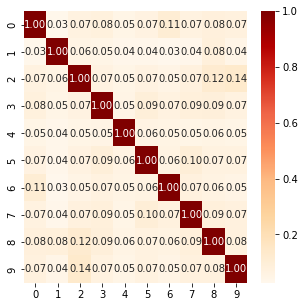

In [ ]:
# Printando heatmap da matriz de similaridade das reviews originais
figure(figsize=(5, 5))
sns.heatmap(df_similaridade, annot=True,cmap="OrRd",fmt=".2f")

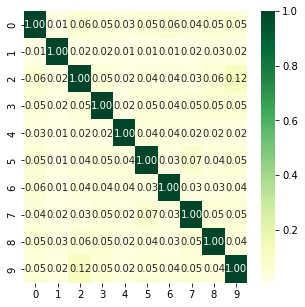

In [ ]:
# Agora, printando o heatmap da matriz de similaridade dos resumos
figure(figsize=(5, 5))
sns.heatmap(df_similaridade_resumos, annot=True,cmap="YlGn",fmt=".2f")

Veja que em nenhum dos dois casos foi possível ver muita coisa que não pudesse já ser vista nas matrizes, pois como a diagonal principal distoa muito dos outros valores acaba desbalanceando a coloeração do heatmap.

Para resolve isso vamos criar uma matriz com o módulo da diferença dos valores da matriz de reviews para a de resumos, e depois faremos seu heatmap.

In [ ]:
# Calculando matriz que apresentará o módulo da diferença
# Perceba que também anulamos os valores das diagonais principais para que eles não atrapalhem
matriz_diferencas = np.zeros((10,10))
for i in range(0, 10):
  for j in range(0,10):
    if i != j:
      matriz_diferencas[i][j] = abs(df_similaridade[i][j]-df_similaridade_resumos[i][j])
    else:
      matriz_diferencas[i][j] = None
df_similaridade_diferencas = pd.DataFrame(matriz_diferencas)
df_similaridade_diferencas

,0,1,2,3,4,5,6,7,8,9
0,NaN,0.019609,0.014265,0.032146,0.018655,0.013317,0.044479,0.026386,0.027551,0.024222
1,0.019609,NaN,0.036877,0.031103,0.030938,0.024542,0.017662,0.022469,0.051863,0.021158
2,0.014265,0.036877,NaN,0.020159,0.029756,0.032167,0.013698,0.046751,0.064810,0.019211
3,0.032146,0.031103,0.020159,NaN,0.034207,0.042924,0.036850,0.040138,0.033940,0.018399
4,0.018655,0.030938,0.029756,0.034207,NaN,0.019598,0.014405,0.024819,0.037322,0.026498
5,0.013317,0.024542,0.032167,0.042924,0.019598,NaN,0.028806,0.031777,0.031190,0.020130
6,0.044479,0.017662,0.013698,0.036850,0.014405,0.028806,NaN,0.044496,0.035467,0.017270
7,0.026386,0.022469,0.046751,0.040138,0.024819,0.031777,0.044496,NaN,0.035694,0.023004
8,0.027551,0.051863,0.064810,0.033940,0.037322,0.031190,0.035467,0.035694,NaN,0.031245
9,0.024222,0.021158,0.019211,0.018399,0.026498,0.020130,0.017270,0.023004,0.031245,NaN


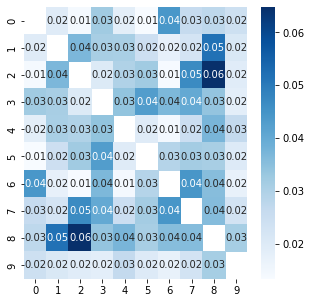

In [ ]:
# Mostrando heatmap do dataframe de diferenças
figure(figsize=(5, 5))
sns.heatmap(df_similaridade_diferencas, annot=True,cmap="Blues",fmt=".2f")

Na imagem acima podemos ver que as diferenças entre os valores de similaridade para as reviews originais e para os resumos não estão a uma distância maior que 0,6 um do outro. Isso pode parecer um valor baixo, mas dada a escala dos valores de similaridade que apresentamos aqui é possível perceber que o resultado não é muito conclusivo.

Vamos fazer uma visualização diferente. Ao invés de computarmos a diferença entre os valores de similaridade das duas situações, vamos computar a razão do valor das similaridade dos textos originais sobre o valor das similaridades dos textos resumidos, assim, podemos ver quantas vezes um cálculo mostra mais ou menos similaridade que o outro.

In [ ]:
# Calculando matriz que apresentará as razões das diferenças
# Perceba que também anulamos os valores das diagonais principais para que eles não atrapalhem
matriz_diferencas_razao = np.zeros((10,10))
for i in range(0, 10):
  for j in range(0,10):
    if i != j:
      matriz_diferencas_razao[i][j] = df_similaridade[i][j]/df_similaridade_resumos[i][j]
    else:
      matriz_diferencas_razao[i][j] = None
df_similaridade_razao = pd.DataFrame(matriz_diferencas_razao)
df_similaridade_razao

,0,1,2,3,4,5,6,7,8,9
0,NaN,2.339685,1.254548,1.676937,1.661864,1.254805,1.700757,1.622261,1.519301,1.480962
1,2.339685,NaN,2.990703,2.825558,5.982020,2.842410,2.943783,2.443585,2.618222,1.974021
2,1.254548,2.990703,NaN,1.442211,2.598135,1.891079,1.379186,2.661499,2.094480,1.165223
3,1.676937,2.825558,1.442211,NaN,2.936671,1.828455,2.040353,1.854972,1.630906,1.345291
4,1.661864,5.982020,2.598135,2.936671,NaN,1.517894,1.366450,2.114117,2.990808,2.307087
5,1.254805,2.842410,1.891079,1.828455,1.517894,NaN,1.893115,1.458647,1.763372,1.411443
6,1.700757,2.943783,1.379186,2.040353,1.366450,1.893115,NaN,2.507711,2.341934,1.480381
7,1.622261,2.443585,2.661499,1.854972,2.114117,1.458647,2.507711,NaN,1.699104,1.452750
8,1.519301,2.618222,2.094480,1.630906,2.990808,1.763372,2.341934,1.699104,NaN,1.709990
9,1.480962,1.974021,1.165223,1.345291,2.307087,1.411443,1.480381,1.452750,1.709990,NaN


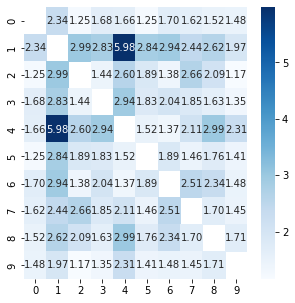

In [ ]:
# Heatmap das razões
figure(figsize=(5, 5))
sns.heatmap(df_similaridade_razao, annot=True,cmap="Blues",fmt=".2f")

Agora sim. Veja que temos muitos valores que não superam 2, porém, também podemos concluir que existem muitos valores cuja a similaridade foi consideravelmente alterada. Veja, por exemplo, a razão de similaridade entre as reviews 1 e 4, perceba que existe 6 vezes mais similaridade no cálculo original do que naquele feito usando os resumos. Tal resultado nos leva a crer que realmente não exista uma relação entre as similaridades para esse caso em específico.

Outro resultado que vale a menção é que todos os valores da matriz de razões de similaridades é  maior que 1, então todas as similaridades par a par entre as reviews originais foram maiores do que as similaridades par a par entre os resumos.

## 7. Conclusões e próximos trabalhos

Nesse trabalho estabelecemos como objetivo realizar um experimento para testar se a similaridade do resumo de dois documentos é semlhante à similaridade dos próprios documentos. Antes de mais nada, devemos destacar que o experimento realizado foi bem simples, pois tratou de uma base de dados pequena, apenas uma métrica de similaridade e apenas uma forma de encontrar resumos. Claro que devido a tais limitações desse projeto não podemos responder a pergunta inicial de forma confiável e bem embasada, porém, com esse projeto abrimos algumas possibilidades de trabalhos futuros para testar essa pergunta. Algumas possibilidades para trabalhos futuros envolvem:
* Aumentar o volume dos dados e ver o comportamento do mesmo experimento;
* Testar diferentes métricas de similaridade;
* Testar diferentes formas de obter os resumos dos textos.